### <h2 align="center">📚 Multiple Linear Regression Project</h2>

#### 1.1 Core Concept

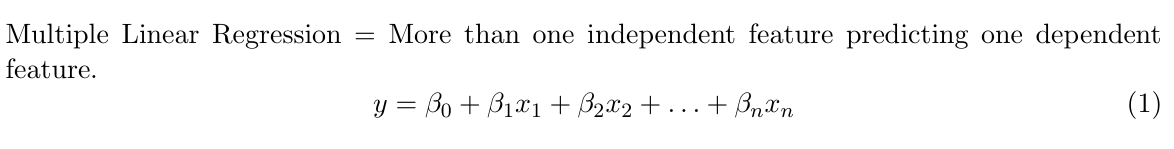

#### 1.2 Dataset: Economic Index

#### 1.3 Step 1: Import Libraries

In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### 1.4 Step 2: Load & Clean Data

In [328]:
df_index=pd.read_csv("economic_index.csv")

In [329]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [330]:
#drop unneccessary columns  with A new DataFrame created
df_index.drop(columns=["Unnamed: 0","year","month"])
df_index.head() #Even if you drop columns, the original DataFrame remains unchanged unless you assign it back or use inplace=True

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [331]:
new_df=df_index.drop(columns=["Unnamed: 0","year","month"])
new_df.head()  # Now if you try to run this code again after running the code where we use inplace=True (See below, i have written that code), then this code show error , because when we do inplace =True then the original dataframe is changed and we can not run this code again.

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


##### <mark>inplace=False (default)</mark>

     Original DataFrame does not change

     A new DataFrame is created

     You must store the result, otherwise nothing happens

     Safer for testing and learning

<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;"> 
<b>Important:</b>

 inplace=True: 
 Updates the DataFrame directly instead of returning a new one.
</div>

In [332]:
#drop unneccessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)
df_index.head()


,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


##### What will happen if we do inplace=False?
When we do inplace=False, it will return a new DataFrame with the null values dropped.

In [333]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [334]:
##check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

---
<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;"> 
<b>Note:</b> What is null values?
</div>

>null values are the missing values in the dataset.


<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;"> 
<b>Note:</b> What does df_index.isnull().sum() do?
</div>

>df_index.isnull().sum() gives the count of null values in each column of the dataset.


<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;"> 
<b>Note:</b> What does df_index.isnull() do?
</div>


>df_index.isnull() gives the boolean values True for null values and False for non-null values.
---

#### 1.5 Step 3: Exploratory Data Analysis

##### Pair Plot Visualization

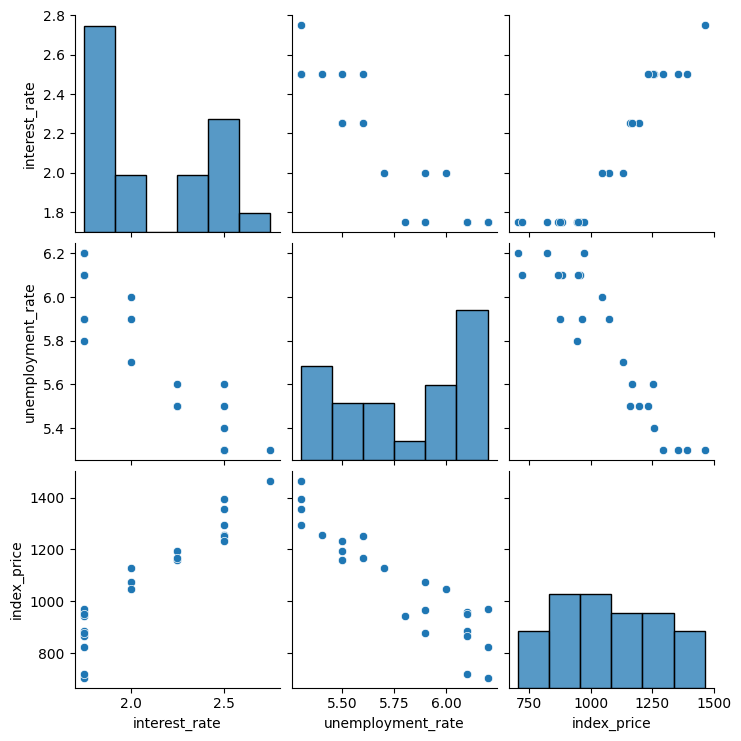

In [335]:
## Lets do some viualization
import seaborn as sns
sns.pairplot(df_index)

#####  Correlation Analysis

In [336]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


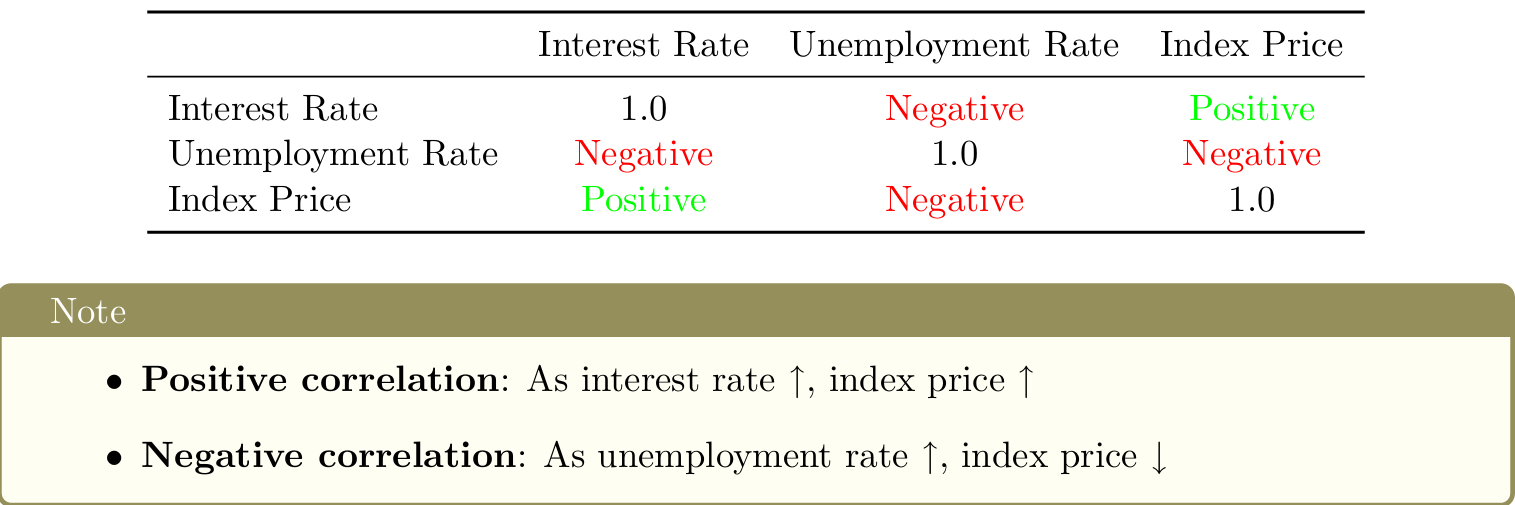

##### Scatter Plot

Text(0, 0.5, 'unemployment rate')

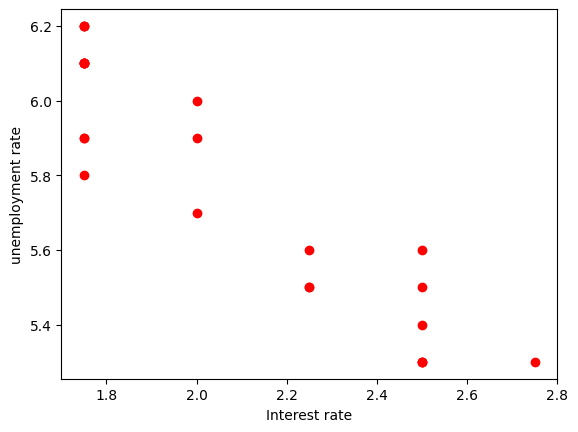

In [337]:
## Visualiza the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

>Here in the graph, we can see that as Interest Rate increases, Unemployment Rate decreases.

#### 1.6 Step 4: Feature Selection

In [338]:
# Method 1 : By column names
X=df_index[['interest_rate','unemployment_rate']]
X.head()


,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [339]:
# Method 2 : By iloc
##independent and dependent features
X=df_index.iloc[:,:-1]  
y=df_index.iloc[:,-1]

```
Trick:

:-1 → last column chhod ke sab

:-2 → last 2 columns chhod ke sab

-1 → sirf last column

: → saare columns

Trick:

0 = first column

1: = first ke baad sab

:1 → sirf first column

Trick:

::2 → har 2nd column (skip 1)

1::2 → 1 se start, har 2nd column

In [340]:
# All columns except last column
X.head() 

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [341]:
# Target variable (Only last column)
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

#### 1.7 Step 5: Train-Test Split

In [342]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

```
In train test split, we split the dataset into two parts:
1. Training set: Used to train the model
2. Testing set: Used to evaluate the model's performance

#### 1.8 Step 6: Regression Plot (Seaborn)

In [343]:
import seaborn as sns


<Axes: xlabel='interest_rate', ylabel='index_price'>

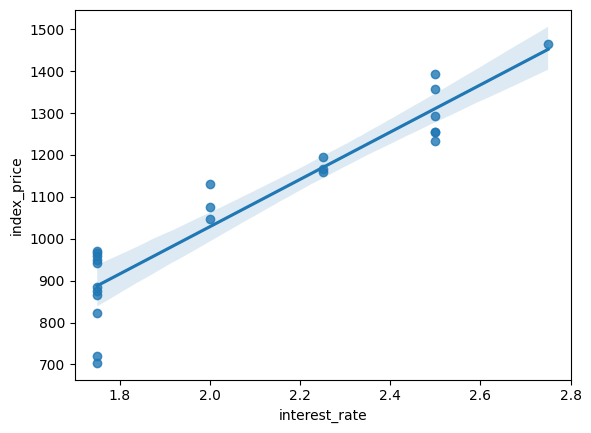

In [344]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

```
regplot() internally bolta hai:

x= → x-axis pe kya plot karna hai

y= → y-axis pe kya plot karna hai

Please don't confuse this with X(features) and y(target variable)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

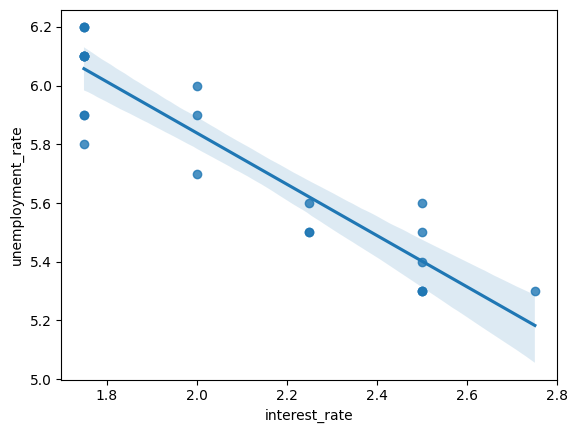

In [345]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

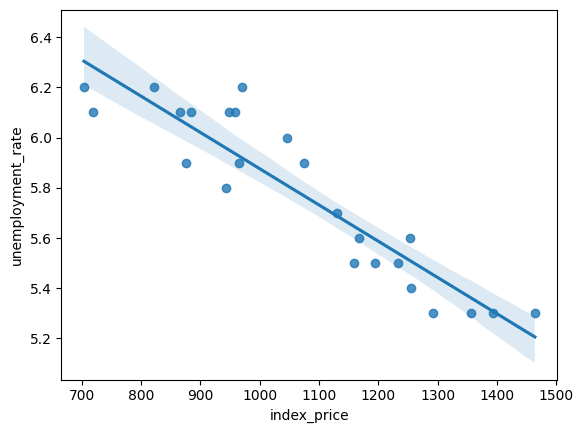

In [346]:
sns.regplot(x=df_index['index_price'],y=df_index['unemployment_rate'])

<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;">
<b>Tip:</b> regplot shows data points + regression line + confidence interval (shaded region).

Shaded region = hyperparameter tuning range for the line.
</div>


<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;">
<b>Warning:</b> regplot only works for 2 features (x and y). Cannot create 3D plots!
</div>

#### 1.9 Step 7: Standard Scaling

In [347]:
from sklearn.preprocessing import StandardScaler

In [348]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)  # Only transform, no fit! to prevent data leakage.

In [349]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;">
<b>Tip:</b> Standard Scaling = (x - mean) / std_dev
</div>

<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;">
<b>Remember:</b> fit transform on training data → transform on test data. Never fit on test data!
</div>

#### 1.10 Step 8: Model Training

In [350]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [351]:
regression.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


```
fit_intercept = True
→ Model intercept (c) include karega
→ Equation: y = mx + c

copy_X = True
→ Training ke time data ki copy use hoti hai
→ Original data safe rehta hai

tol = 1e-06
→ Chhota sa stopping threshold
→ Improvement bahut kam ho jaaye to training ruk jaati hai

n_jobs = None
→ Default CPU usage
→ -1 dene par saare cores use hote hain

positive = False
→ Coefficients positive ya negative dono ho sakte hain

<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;">
<b>Important:</b> The output you are getting is not any prediction or result.It is just telling you that the model has been trained successfully.
</div>

#### 1.11 Step 9: Cross-Validation


>**Definition :**

>Cross-Validation: Technique to evaluate model by splitting training data into multiple
folds for validation.

In [352]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(
    regression,      # the model
    X_train,y_train, # training data
    scoring='neg_mean_squared_error', # scoring metric
    cv=3 # number of folds
    )

##### Cross Validation (CV) 

---

###### What is Cross Validation?
Cross Validation is a technique used to evaluate a machine learning model by training and testing it multiple times on different parts of the same dataset.

---

###### Meaning of `cv = 5`
- The dataset is divided into **5 equal parts (folds)**
- Each fold is used **once as test data**
- The remaining folds are used as **training data**

---

###### Simple Example (10 Records, cv = 5)

Assume we have **10 data points**: Data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Since `cv = 5`:

- Records per fold = 10 ÷ 5 = **2**

---

###### Fold-wise Split

| Fold | Test Data | Train Data |
|------|-----------|------------|
| 1 | [1, 2] | [3, 4, 5, 6, 7, 8, 9, 10] |
| 2 | [3, 4] | [1, 2, 5, 6, 7, 8, 9, 10] |
| 3 | [5, 6] | [1, 2, 3, 4, 7, 8, 9, 10] |
| 4 | [7, 8] | [1, 2, 3, 4, 5, 6, 9, 10] |
| 5 | [9, 10] | [1, 2, 3, 4, 5, 6, 7, 8] |

---

###### Key Rule
- **Test data changes in every fold**
- **Training data = all remaining data**

---


```
Q. What cross_val_score() Returns

Answer : One score for each fold
Total scores = number of folds (cv)

Example:

[-MSE1, -MSE2, -MSE3, -MSE4, -MSE5]

Q. Why neg_mean_squared_error is Used ?

Answer : Scikit-learn always maximizes the score 
Mean Squared Error (MSE) should be minimized
So sklearn returns negative MSE (Closer to 0 is better.)
This is a sklearn convention

```

In [353]:
print(np.mean(validation_score)) # In simple language, Model ne 3 baar test diya, un 3 scores ka average hi final performance hai


-5914.828180162386


<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;"><b>Important:</b> 

-5914.83 is the average negative mean squared error from cross validation; closer to zero indicates better model performance.
</div>

#### 1.12 Step 10: Prediction & Metrics

In [354]:
## prediction
y_pred=regression.predict(X_test)

In [355]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [356]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


```
Here, we can see that MSE is too large as compared to the other two, which indicates that outliers have a significant impact on the model.

In [357]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
n=len(y_test)
p=X_test.shape[1]
adjusted_r2=1 - (1-score)*(n-1)/(n-p-1)
print(adjusted_r2)


0.7591371539010257
0.5985619231683761


<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;"><b>Important:</b> 

Adjusted R2 is always ≤ R2. It penalizes adding irrelevant features.
</div>

#### 1.13 Step 11: Model Assumptions Validation

##### Assumption 1: Linear Relationship (y_test vs y_pred)


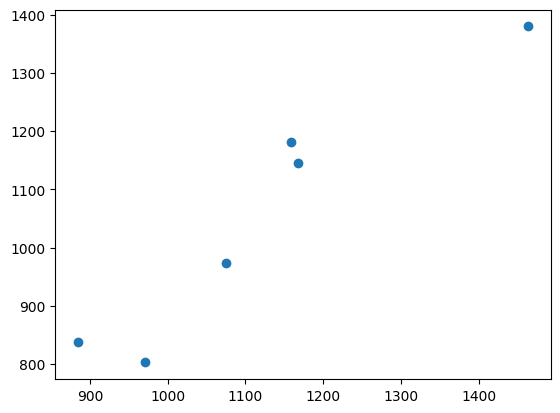

In [358]:
plt.scatter(y_test,y_pred)

```
Expected: Linear pattern → Model performed well.

#####  Assumption 2: Residuals Normal Distribution

In [359]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


```
Expected: Bell curve (Normal distribution) → Good model.

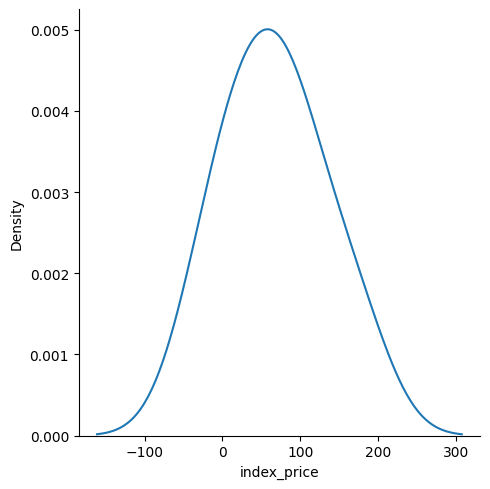

In [360]:
## Plot this residuals
sns.displot(residuals,kind='kde')

####  Assumption 3: Residuals vs Predictions (Homoscedasticity)
```
Expected: Random scatter with no clear pattern → Model residuals are homoscedastic.

```
Residuals mean the difference between the actual values (y_test) and the predicted values (y_pred).


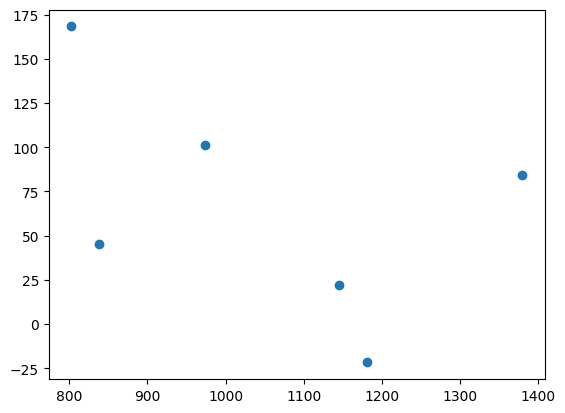

In [361]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

<div style="border:2px solid #247026ff; padding:10px; border-radius:8px;"><b>Important:</b> 

Good: Uniformly distributed (no pattern).

Bad: Any visible pattern (funnel shape, curve, etc.).

</div>

#### 1.14 Step12: OLS Verification

In [362]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [363]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 20 Dec 2025   Prob (F-statistic):                       0.754
Time:                        23:39:05   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(regression.coef_)  # sklearn coefficients

[  88.27275507 -116.25716066]


In [365]:
print(regression.intercept_) # sklearn intercept

1053.4444444444443
